<a href="https://colab.research.google.com/github/EstebanmAcero/Works/blob/main/Pib_de_china.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Luis Esteban Molina Acero 201910203**
# **Manuel Velez PhD.**

**Predicción del PIB (GDP) de China para 2022 utilizando Regresión No Lineal**


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# <font face="Comic Sans MS,arial,verdana" color="Blue"> Descarga y carga de datos: #
* Descarga el conjunto de datos del PIB de China desde el archivo proporcionado.
* Utiliza la biblioteca Pandas para cargar y explorar los datos. Con pandas se puede usar el archivo CSV directamente. Asegúrate de comprender la estructura y las características del conjunto de datos.


In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


<font face="Comic Sans MS,arial,verdana">Con el metedo read_*** se puede leer cualquier tipo de archivo en este caso un csv, y por eso buscamos que parametros de entrada nos pide y cual es la salida que nos puede entregar.</font>


In [274]:
pd.read_csv?

<font face="Comic Sans MS,arial,verdana" >Leemos el archivo china_gdp.csv</font>




In [275]:
df = pd.read_csv('china_gdp.csv')

<font face="Comic Sans MS,arial,verdana" >Colocamos como titulo en las columnas la fecha y el PIB correspodiente.
<p>

También shape puesto que queremos saber el tamaño de los datos
</font>


In [276]:
df.columns = ['Date', 'Pib']
df.shape

(55, 2)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# <font face="Comic Sans MS,arial,verdana" color="Blue">Análisis exploratorio de datos:
<p>a. Realiza un análisis exploratorio de los datos para identificar tendencias y patrones en el PIB de China a lo largo de los años. <p>
b. Visualiza los datos utilizando gráficos y visualizaciones adecuadas para comprender mejor su distribución y variación.

</fond>

In [277]:
df.head()  # Esto es para ver el encabezado o los primeras 5 filas.

,Date,Pib
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [278]:
df.dtypes
print("La media es")
df.mean()

La media es


Date    1.987000e+03
Pib     1.437042e+12
dtype: float64

In [279]:
print("La desviación estandar es ")  # Esto con el fin de calcular que tan dispersos estan los datos
df.std()

La desviación estandar es 


Date    1.602082e+01
Pib     2.500085e+12
dtype: float64

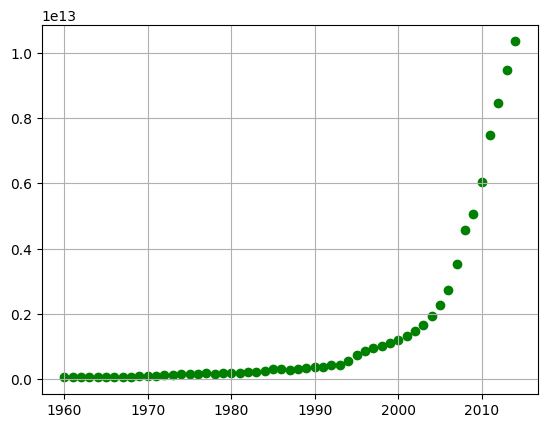

In [280]:
plt.scatter(df['Date'], df['Pib'], c = "green")
plt.grid(True)  # Agrega una cuadrícula al gráfico


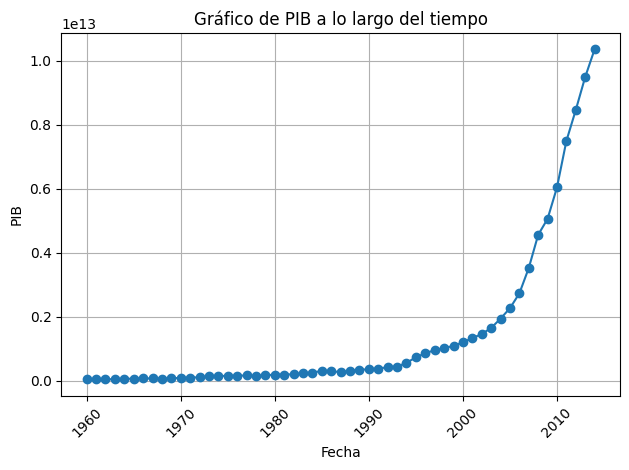

In [281]:
plt.plot(df['Date'], df['Pib'], marker='o', linestyle='-')  # Crea el gráfico de línea con marcadores
plt.xlabel('Fecha')
plt.ylabel('PIB')
plt.title('Gráfico de PIB a lo largo del tiempo')
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mayor claridad

plt.tight_layout()  # Ajusta automáticamente los márgenes para que la gráfica sea legible

plt.show()  # Muestra la gráfica

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# <font face="Comic Sans MS,arial,verdana" color="Blue">Selección de modelo de regresión no lineal: <p>
a. Investiga y selecciona al menos un método de regresión no lineal para implementar en este ejercicio. Puedes considerar modelos como regresión polinómica, regresión por splines, regresión de base radial, entre otros. <p>
b. Comprende el funcionamiento del modelo elegido y cómo se ajusta a los datos no lineales.

</fond>

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-282-b91c08b597b8>:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)


Los parámetros óptimos son para a = 1.0 y b = 1.0
inf


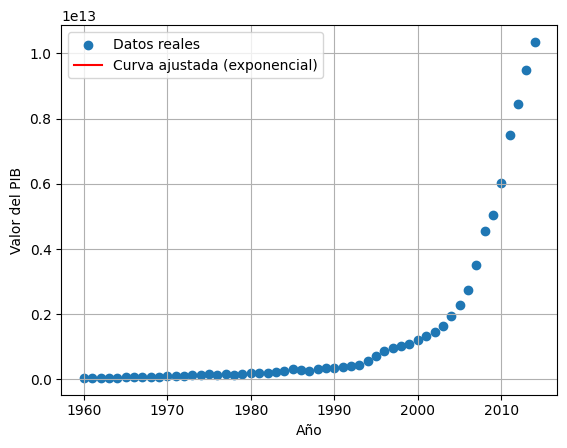

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define la función exponencial que queremos ajustar
def funcion_exponencial(x, a, b):
    return a * np.exp(b * x)

# Datos de ejemplo
x = df['Date']
y = df['Pib']
# Realiza el ajuste exponencial utilizando curve_fit
parametros_optimizados, matriz_covarianza = curve_fit(funcion_exponencial, x, y)
a_optimo, b_optimo = parametros_optimizados
print("Los parámetros óptimos son para a =", a_optimo, "y b =", b_optimo)

# Genera una serie de puntos para la curva ajustada
x_curva = np.linspace(1950, 2022, 100)
y_curva = funcion_exponencial(x_curva, a_optimo, b_optimo)

#year = int(input("Ingresa el año al cual quiere saber la projección del Pib de china: "))
year = 2022
valor = funcion_exponencial(year,1,1)
print(valor)

# Plotea los datos y la curva ajustada
plt.scatter(x, y, label='Datos reales')
plt.plot(x_curva, y_curva, 'r', label='Curva ajustada (exponencial)')  # Utiliza plt.plot para la curva
plt.legend()
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.xlabel('Año')
plt.ylabel('Valor del PIB')
plt.show()

# <font face="Comic Sans MS,arial,verdana" >
Al intentar una regresión exponencial, cuando ingresamos el valor 2022 no obtenemos nada debido a que da un valor demasiado grande por tener por valores : <p> A = 1
<p> B = 1
<p> Por lo cual visualimos un vacion en la grafica

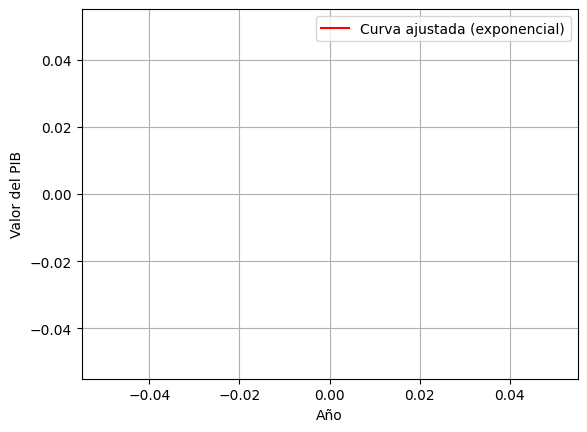

In [283]:
plt.plot(x_curva, y_curva, 'r', label='Curva ajustada (exponencial)')  # Utiliza plt.plot para la curva
plt.legend()
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.xlabel('Año')
plt.ylabel('Valor del PIB')
plt.show()

# <font face="Comic Sans MS,arial,verdana" >
Como me quedo la duda de si se podian realizar regresiones de tipo exponencial copie un ejemplo para visualizar como funciona el algotirmo.

[2.54152218 1.18635403 0.46290236]
[2.49050104 1.         0.38455511]


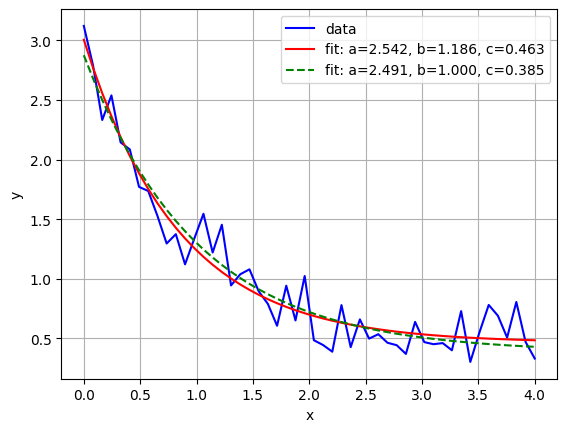

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Define the data to be fit with some noise:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')

# Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1, and 0 <= c <= 0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.ylabel('y')
plt.legend()
plt.show()


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# <font face="Comic Sans MS,arial,verdana" color="Blue">Entrenamiento y ajuste del modelo:
<p> a. Implementa el modelo de regresión no lineal seleccionado utilizando las bibliotecas adecuadas.<p> b. Ajusta el modelo utilizando los datos de entrenamiento y valida su rendimiento utilizando los datos de prueba.

</fond>

<ipython-input-285-e864324c3958>:42: RankWarning: Polyfit may be poorly conditioned
  varios_modelos(10, year)


            10             9             8          7         6
-1.339e-11 x  + 8.604e-08 x - 0.0001053 x - 0.2561 x + 178.5 x
              5             4             3             2
 + 1.141e+06 x + 6.546e+08 x - 4.113e+12 x - 6.481e+15 x + 2.173e+19 x - 1.361e+22

 El Pib para el año 2022 se proyecta en 29.52 billones de dólares


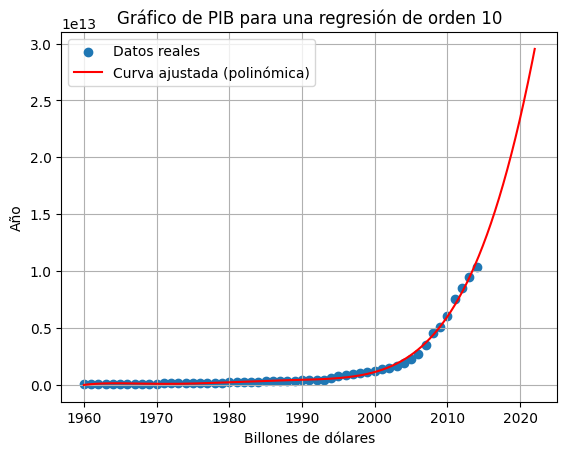

<ipython-input-285-e864324c3958>:43: RankWarning: Polyfit may be poorly conditioned
  varios_modelos(8, year)


            8         7        6             5             4
-0.0001488 x + 1.269 x - 3304 x - 2.326e+05 x + 1.191e+10 x
              3             2
 - 1.379e+12 x - 5.222e+16 x + 8.104e+19 x - 3.821e+22

 El Pib para el año 2022 se proyecta en 29.59 billones de dólares


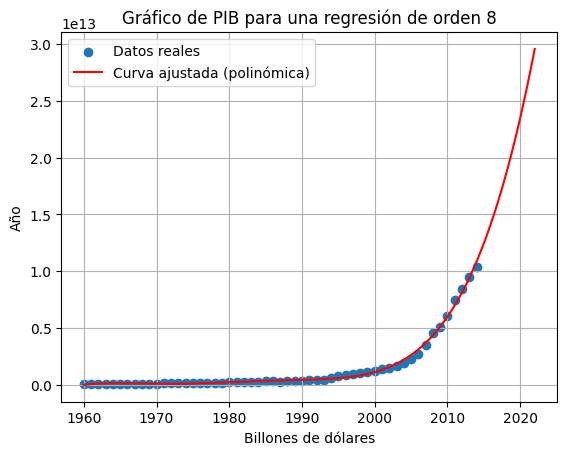

<ipython-input-285-e864324c3958>:44: RankWarning: Polyfit may be poorly conditioned
  varios_modelos(7, year)


         7         6             5             4             3
0.01463 x - 94.95 x + 1.379e+05 x + 2.451e+08 x - 4.783e+11 x
              2
 - 1.091e+15 x + 2.901e+18 x - 1.744e+21

 El Pib para el año 2022 se proyecta en 30.93 billones de dólares


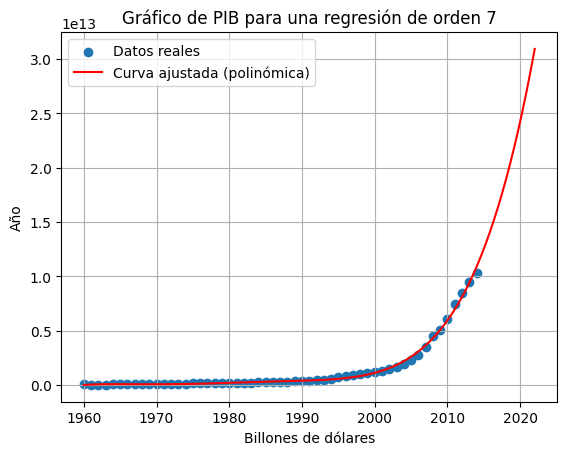

           5             4             3             2
2.192e+05 x - 2.169e+09 x + 8.579e+12 x - 1.697e+16 x + 1.679e+19 x - 6.641e+21

 El Pib para el año 2022 se proyecta en 30.87 billones de dólares


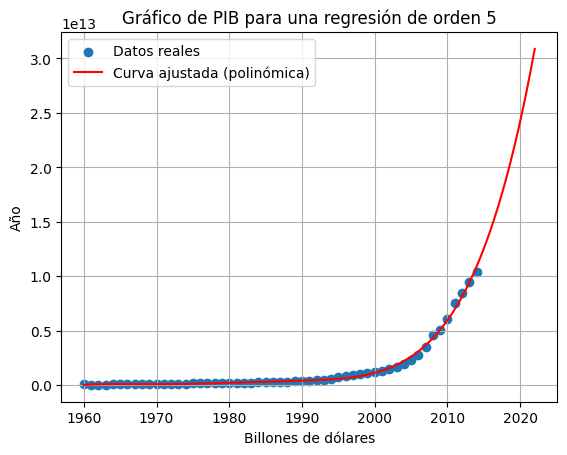

           4             3             2
9.674e+06 x - 7.661e+10 x + 2.275e+14 x - 3.003e+17 x + 1.486e+20

 El Pib para el año 2022 se proyecta en 26.20 billones de dólares


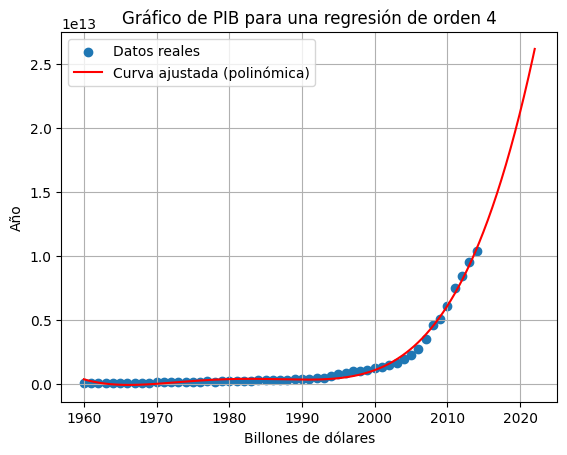

           3             2
2.759e+08 x - 1.638e+12 x + 3.243e+15 x - 2.14e+18

 El Pib para el año 2022 se proyecta en 18.88 billones de dólares


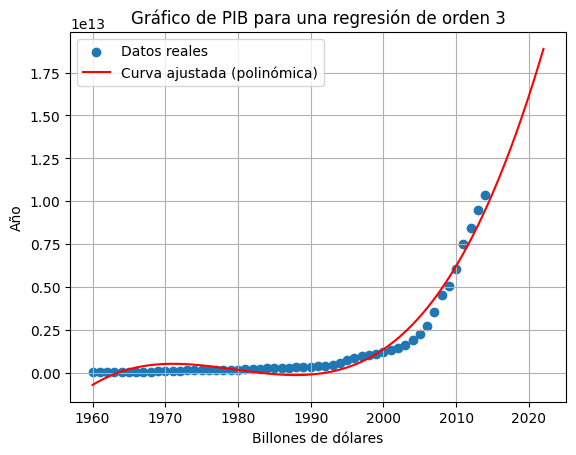

           2
6.206e+09 x - 2.455e+13 x + 2.428e+16

 El Pib para el año 2022 se proyecta en 11.43 billones de dólares


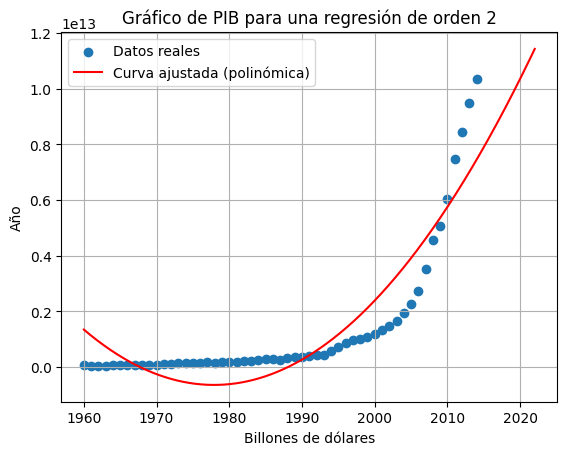

In [285]:
def formato_en_billones(numero):
    # Verifica si el número es mayor o igual a un billón
    if abs(numero) >= 1e12:
        # Divide el número por un billón y formatea la cadena
        numero_billones = numero / 1e12
        return f'\n El Pib para el año 2022 se proyecta en {numero_billones:.2f} billones de dólares'

def varios_modelos(grado_pol, year):
        x = df['Date']
        y = df['Pib']

        # Ajusta un polinomio de segundo grado (parábola)
    #    grado_pol = 3
        coeffs = np.polyfit(x, y, grado_pol)

        # Crea una función polinómica a partir de los coeficientes
        polinomio = np.poly1d(coeffs)
        print(polinomio)

        # Genera puntos para la curva ajustada
        x_curva = np.linspace(min(x), 2022, 1000)
        y_curva = polinomio(x_curva)


        valor = polinomio(year)
        resultado = formato_en_billones(valor)
        print(resultado)

        plt.scatter(x, y, label='Datos reales')
        plt.plot(x_curva, y_curva, 'r', label='Curva ajustada (polinómica)')

        plt.title(f'Gráfico de PIB para una regresión de orden {grado_pol}')

        plt.legend()
        plt.xlabel('Billones de dólares')
        plt.ylabel('Año')
        plt.grid(True)  # Agrega una cuadrícula al gráfico
        plt.show()

#year = int(input("\n Ingresa el año al cual quiere saber la projección del Pib de china: "))
year = 2022
varios_modelos(10, year)
varios_modelos(8, year)
varios_modelos(7, year)
varios_modelos(5, year)
varios_modelos(4, year)
varios_modelos(3, year)
varios_modelos(2, year)

# <font face="Comic Sans MS,arial,verdana" color="Blue">
<p> Si bien el modelo que mejor se parece al comienzo es una regresión polinomica de grado 5, cuando se hace una proyección a 2022 nos da un dato de 30 billones, el cual no coincide con datos reales por lo que la opcion mas adecuada cercana tanto en proyección como en regresión es de nivel 3.
</fond>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# <font face="Comic Sans MS,arial,verdana" color="Blue">Predicción y comparación:
<p> a. Utiliza el modelo entrenado para predecir el PIB de China para el año 2022.
<p> b. Compara la predicción del modelo con los datos reales del PIB de China para 2022.

           3             2
2.759e+08 x - 1.638e+12 x + 3.243e+15 x - 2.14e+18

 El Pib para el año 2000 se proyecta en 1.37 billones de dólares 
 Con una regresion de 3 grado 


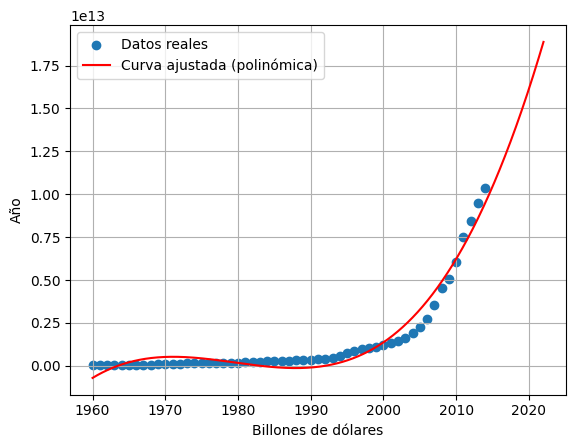

In [286]:
def formato_en_billones(numero,year,regresion):
    # Verifica si el número es mayor o igual a un billón
    if abs(numero) >= 1e12:
        # Divide el número por un billón y formatea la cadena
        numero_billones = numero / 1e12
        return f'\n El Pib para el año {year:d} se proyecta en {numero_billones:.2f} billones de dólares \n Con una regresion de {regresion:1d} grado '

def varios_modelos(grado_pol, year):
        x = df['Date']
        y = df['Pib']

        # Ajusta un polinomio de segundo grado (parábola)
    #    grado_pol = 3
        coeffs = np.polyfit(x, y, grado_pol)

        # Crea una función polinómica a partir de los coeficientes
        polinomio = np.poly1d(coeffs)
        print(polinomio)

        valor = polinomio(year)
        resultado = formato_en_billones(valor,year,grado_pol)
        print(resultado)

             # Genera puntos para la curva ajustada
        x_curva = np.linspace(min(x), 2022, 1000)
        y_curva = polinomio(x_curva)

        plt.scatter(x, y, label='Datos reales')
        plt.plot(x_curva, y_curva, 'r', label='Curva ajustada (polinómica)')

        plt.legend()
        plt.xlabel('Billones de dólares')
        plt.ylabel('Año')
        plt.grid(True)  # Agrega una cuadrícula al gráfico
        plt.show()

prediccion_2022 = varios_modelos(3, 2000)


In [287]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Carga tus datos aquí, asumiendo que ya tienes un DataFrame df con las columnas 'Date' y 'Pib'

def funcion_proyeccion(grado):
    x = df['Date']  # Rango de años desde 1960 hasta 2022
    y = df['Pib']

    df_proyecciones = pd.DataFrame({"Dates": x, "Pib": y})
    for g in range(3, 11):  # Loop para grados del 3 al 10
        # Ajusta un polinomio de grado variable
        coeffs = np.polyfit(x, y, g)

        # Crea una función polinómica a partir de los coeficientes
        polinomio = np.poly1d(coeffs)

        proyecciones = []  # Almacenará las proyecciones para cada año desde 1960 hasta 2014
        for year in range(1960, 2015):
            valor = polinomio(year)
            proyecciones.append(valor)

        # Agregar las proyecciones al DataFrame
        df_proyecciones[f"Proyecciones grado {g}"] = proyecciones

    # Imprimir el DataFrame completo con todas las proyecciones
    print(df_proyecciones)

    errores_cuadraticos = {}  # Almacenará los errores cuadráticos para cada grado
    for g in range(3, 11):
        proyecciones_grado = df_proyecciones[f"Proyecciones grado {g}"]
        mse = mean_squared_error((y/1e12), (proyecciones_grado/1e12))
        errores_cuadraticos[f"Grado {g}"] = mse

    # Imprimir los errores cuadráticos
    print("Errores Cuadráticos Medios (MSE) para cada grado:")
    for grado, mse in errores_cuadraticos.items():
        print(f"{grado}: {mse}")


funcion_proyeccion(10)  # mk ya los datos se parecen al fin pero el maldito error esta muy grande

# ya arregle el error toca dividir entre 1e12


    Dates           Pib  Proyecciones grado 3  Proyecciones grado 4  \
0    1960  5.918412e+10         -7.059322e+11          3.429774e+11   
1    1961  4.955705e+10         -4.656226e+11          1.948021e+11   
2    1962  4.668518e+10         -2.559437e+11          8.196532e+10   
3    1963  5.009730e+10         -7.524002e+10          2.019820e+08   
4    1964  5.906225e+10          7.814394e+10         -5.452032e+10   
5    1965  6.970915e+10          2.058636e+11         -8.600217e+10   
6    1966  7.587943e+10          3.095744e+11         -9.781202e+10   
7    1967  7.205703e+10          3.909318e+11         -9.328588e+10   
8    1968  6.999350e+10          4.515913e+11         -7.552795e+10   
9    1969  7.871882e+10          4.932082e+11         -4.741002e+10   
10   1970  9.150621e+10          5.174381e+11         -1.157163e+10   
11   1971  9.856202e+10          5.259364e+11          2.957951e+10   
12   1972  1.121598e+11          5.203585e+11          7.386815e+10   
13   1

<ipython-input-287-44cea3006cec>:42: RankWarning: Polyfit may be poorly conditioned
  funcion_proyeccion(10)  # mk ya los datos se parecen al fin pero el maldito error esta muy grande
<ipython-input-287-44cea3006cec>:42: RankWarning: Polyfit may be poorly conditioned
  funcion_proyeccion(10)  # mk ya los datos se parecen al fin pero el maldito error esta muy grande
<ipython-input-287-44cea3006cec>:42: RankWarning: Polyfit may be poorly conditioned
  funcion_proyeccion(10)  # mk ya los datos se parecen al fin pero el maldito error esta muy grande
<ipython-input-287-44cea3006cec>:42: RankWarning: Polyfit may be poorly conditioned
  funcion_proyeccion(10)  # mk ya los datos se parecen al fin pero el maldito error esta muy grande
<ipython-input-287-44cea3006cec>:42: RankWarning: Polyfit may be poorly conditioned
  funcion_proyeccion(10)  # mk ya los datos se parecen al fin pero el maldito error esta muy grande


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



# <font face="Comic Sans MS,arial,verdana" color="Blue">Evaluación y conclusión:
<p>a. Evalúa el rendimiento del modelo utilizando métricas apropiadas para la regresión.
<p> b. Proporciona conclusiones sobre la capacidad del modelo para realizar predicciones precisas en datos no lineales y su capacidad para estimar el PIB de China en 2022.

<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparación(2010)
<ipython-input-288-e0d9804faf60>:37: RankWarning: Polyfit may be poorly conditioned
  funcion_comparació

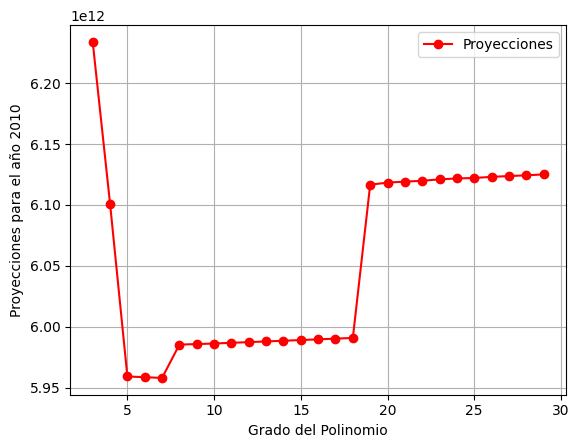

Proyecciones para el año 2010:
Grado 3: 6233787711232.0
Grado 4: 6101123334144.0
Grado 5: 5959151779840.0
Grado 6: 5958517391360.0
Grado 7: 5957933858816.0
Grado 8: 5985296973824.0
Grado 9: 5985716404224.0
Grado 10: 5986184069120.0
Grado 11: 5986770223104.0
Grado 12: 5987322822656.0
Grado 13: 5987884335104.0
Grado 14: 5988450566144.0
Grado 15: 5989026496512.0
Grado 16: 5989604524032.0
Grado 17: 5990188449792.0
Grado 18: 5990775128064.0
Grado 19: 6116570300416.0
Grado 20: 6118281576448.0
Grado 21: 6119086882816.0
Grado 22: 6119774748672.0
Grado 23: 6120965931008.0
Grado 24: 6121678962688.0
Grado 25: 6122090004480.0
Grado 26: 6123000168448.0
Grado 27: 6123671257088.0
Grado 28: 6124266848256.0
Grado 29: 6125013434368.0


In [288]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


def funcion_comparación(year):
    x = df['Date']  # Rango de años desde 1960 hasta 2022
    y = df['Pib']

    grados = list(range(3, 30))  # Lista de grados del 3 al 29
    proyecciones = []  # Almacenará las proyecciones para cada grado

    for g in grados:
        # Ajusta un polinomio de grado variable
        coeffs = np.polyfit(x, y, g)

        # Crea una función polinómica a partir de los coeficientes
        polinomio = np.poly1d(coeffs)

        # Calcula la proyección para el año específico
        valor = polinomio(year)
        proyecciones.append(valor)

    # Trama un gráfico de las proyecciones en función del grado del polinomio
    plt.plot(grados, proyecciones, 'ro-', label='Proyecciones')
    plt.legend()
    plt.xlabel('Grado del Polinomio')
    plt.ylabel(f'Proyecciones para el año {year}')
    plt.grid(True)  # Agrega una cuadrícula al gráfico
    plt.show()

    # Imprimir las proyecciones para el año especificado
    print(f"Proyecciones para el año {year}:")
    for grado, valor in zip(grados, proyecciones):
        print(f"Grado {grado}: {valor}")

funcion_comparación(2010)


# <font face="Comic Sans MS,arial,verdana" color="Green"> Conclusiones
> <p style="color: green;">Para las conclusiones se puede decir que el modelo de regresión polinómica es adecuado siempre y cuando se tenga en cuenta una comparación con los datos reales, porque si bien modelos de un grado mayor se ajustan más a los distintos puntos históricos, al hacer la comparación con 2022, el modelo de nivel 3 es el que tuvo mayor acercamiento a pesar de que las proyecciones para los primeros años (1960 - 1970) daban negativas.</p>

> <p>Otra gran conclusión se basa en que estos modelo si bien son crecientes el ajuste de una exponencial no llega a acomodarse a sus parametros de entrada y salida.
> <p>Por ultimo recodar que a mayor nivel de regresión mayores recursos se gastan y mas lento puede ser el procesamiento de información por lo que si se tuviese una base de datos mucho mas extensa sería conveniente fragmentar los registros.

